# MNIST Dataset notebook 
***

The MNIST (Modified National Institute of Standards and Technology database) database is a database of handwritten digits used for machine learning and computer vision research. The set of images in the MNIST database were developed from the combination of two of NIST's databases: Special Database 1 developed by high school students which was a testing dataset and Special Database 3, developed by employees of the United States Census Bureau which was a training dataset. The black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

Samples from the MNIST test data set

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://d3ucjech6zwjp8.cloudfront.net/720x480/mnistexamples_crop-a96896fe8fa3661109fdb86e638b5b9a.jpg")

The MNIST database contains 60,000 training images and 10,000 testing images. Each image set has a 50/50 split on the images taken from the training and testing sets. An extended dataset similar to MNIST called EMNIST has been published in 2017, which contains 240,000 training images, and 40,000 testing  of handwritten digits and characters.
***

gzip is a file format and a software application used for file compression and decompression.

This library is used as an interface to compress and decompress files. Open a gzip-compressed file in binary or text mode as f.
Then f.read allows the user to read the contents of the gzip file. 


In [2]:
# Adapted from: https://docs.python.org/3/library/gzip.html
import gzip

with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    file_content = f.read()

Displays the format in which the contents of the imported gz file is stored, here it is stored in bytes.
A byte is a unit of data, normally 8 binary digits long. A byte is used to represent a character such as a letter, number or symbol.

In [3]:
type(file_content)

bytes

Displays the contents of the array at the index between 0 and 4. 

In [4]:
file_content[0:4]

b'\x00\x00\x08\x03'

### Little and Big Endians

Endianness is the sequential order in which bytes are arranged into larger numerical values when they are stored into memory or  transmitted over digital links. There are two formats in which they are stored these are in big-endian or little-endian formats. 

Most computer systems prefer a single format for all its data; using the system's native format is automatic. But when reading memory or receiving transmitted data from a different computer system, it is often required to process and translate data between the preferred native endianness format to the opposite format.

These are also not compatible with one another. In big endian the are ordered from their most significant bit  value of the sequence(the big end) and little endian they are arranged from their least significant bit value of the sequence(the little end. A byte is handled as a single numerical value or character symbol and so bit sequence order is avoided. 

In [5]:
Image(url= "https://upload.wikimedia.org/wikipedia/en/7/77/Big-little_endian.png")

In the big-endian format, whenever addressing memory or sending/storing words the most significant byte which contains the most significant bit is stored first and therfore has the lowest address or is sent first, then the following bytes are stored or sent in an order of decreasing significance. The least significant byte containing the least significant bit is stored last thus having the highest address or sent last.

Little-endian format is the opposite here addressing memory or sending/storing the least significant byte starting with the lowest address first and the most significant byte last which has the highest address.

***

Return the integer represented by the given array of bytes.

In [6]:
int.from_bytes(file_content[0:4], byteorder='big')

2051

In [7]:
int.from_bytes(file_content[0:4], byteorder='little')

50855936

In [8]:
int.from_bytes(file_content[4:8], byteorder='big')

10000

In [9]:
int.from_bytes(file_content[8:12], byteorder='little')

469762048

In [10]:
int.from_bytes(file_content[12:16], byteorder='big')

28

### Reading a single image

In [14]:
l = file_content[16:800]

In [15]:
type(l)

bytes

In [16]:
import numpy as np

image = ~np.array(list(file_content[16:800])).reshape(28,28).astype(np.uint8)

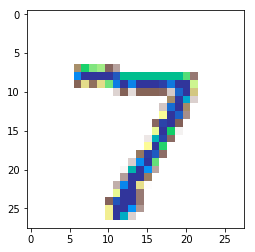

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(image, cmap='terrain')

In [18]:
plt.imsave('fig7.png',image,cmap='jet')

- **Display Labels**

In [19]:
# Adapted from: https://docs.python.org/3/library/gzip.html

import gzip

with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    labels = f.read()

In [20]:
int.from_bytes(labels[8:9], byteorder="big")

7